<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220623_Squid_Game_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/11/03/squid-game-sentiment-analysis-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/squid_game_sentiment_analysis_dataset.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [7]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [8]:
data.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [9]:
data.drop(columns='user_location', axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_description  74808 non-null  object
 2   user_created      80019 non-null  object
 3   user_followers    80019 non-null  int64 
 4   user_friends      80019 non-null  int64 
 5   user_favourites   80019 non-null  int64 
 6   user_verified     80019 non-null  bool  
 7   date              80019 non-null  object
 8   text              80019 non-null  object
 9   source            80019 non-null  object
 10  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 5.6+ MB


In [15]:
((data.isnull().sum() / data.count()) * 100).sort_values(ascending=False)

user_description    6.965833
user_name           0.004999
user_created        0.000000
user_followers      0.000000
user_friends        0.000000
user_favourites     0.000000
user_verified       0.000000
date                0.000000
text                0.000000
source              0.000000
is_retweet          0.000000
dtype: float64

In [16]:
data.drop(columns='user_description', axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        80015 non-null  object
 1   user_created     80019 non-null  object
 2   user_followers   80019 non-null  int64 
 3   user_friends     80019 non-null  int64 
 4   user_favourites  80019 non-null  int64 
 5   user_verified    80019 non-null  bool  
 6   date             80019 non-null  object
 7   text             80019 non-null  object
 8   source           80019 non-null  object
 9   is_retweet       80019 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 5.0+ MB


In [21]:
data.dropna(inplace=True)

In [22]:
data.isnull().sum()

user_name          0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80015 entries, 0 to 80018
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        80015 non-null  object
 1   user_created     80015 non-null  object
 2   user_followers   80015 non-null  int64 
 3   user_friends     80015 non-null  int64 
 4   user_favourites  80015 non-null  int64 
 5   user_verified    80015 non-null  bool  
 6   date             80015 non-null  object
 7   text             80015 non-null  object
 8   source           80015 non-null  object
 9   is_retweet       80015 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 5.6+ MB


In [26]:
data.text[0]

'When life hits and the same time poverty strikes you\nGong Yoo : Lets play a game \n#SquidGame #Netflix https://t.co/Cx7ifmZ8cN'

In [27]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [30]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [31]:
data['text_clean'] = data['text'].apply(clean)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80015 entries, 0 to 80018
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        80015 non-null  object
 1   user_created     80015 non-null  object
 2   user_followers   80015 non-null  int64 
 3   user_friends     80015 non-null  int64 
 4   user_favourites  80015 non-null  int64 
 5   user_verified    80015 non-null  bool  
 6   date             80015 non-null  object
 7   text             80015 non-null  object
 8   source           80015 non-null  object
 9   is_retweet       80015 non-null  bool  
 10  text_clean       80015 non-null  object
dtypes: bool(2), int64(3), object(6)
memory usage: 8.3+ MB


In [ ]:
STOPWORDS

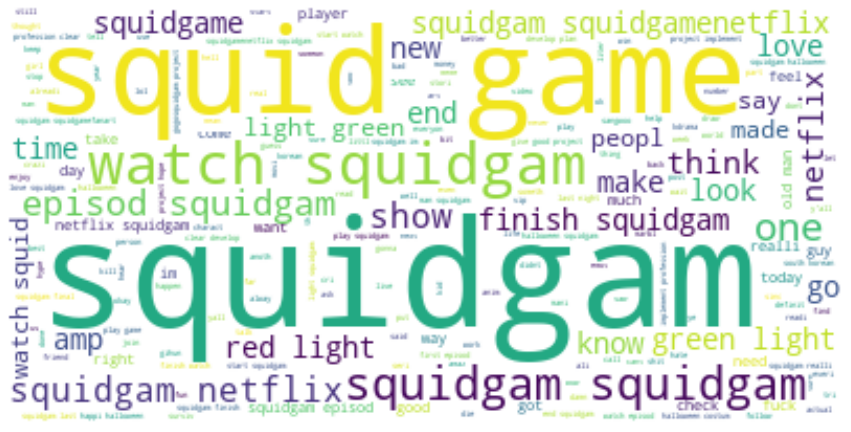

In [35]:
text = ' '.join(i for i in data['text_clean'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
sentiments=SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['text_clean']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['text_clean']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['text_clean']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['text_clean']]

In [38]:
data2 = data[['text_clean', 'Positive', 'Negative', 'Neutral', 'Compound']]

In [39]:
data2.head()

,text_clean,Positive,Negative,Neutral,Compound
0,life hit time poverti strike yougong yoo let ...,0.173,0.108,0.719,0.2263
1,marbl episod squidgam ruin 😭😭😭,0.000,0.487,0.513,-0.5859
2,squidgam time,0.000,0.000,1.000,0.0000
3,blood slideim join squidgam thing im alreadi ...,0.142,0.277,0.581,-0.4767
4,two first game player kill mask guy bloodi ni...,0.000,0.461,0.539,-0.8860


In [40]:
a = sum(data2['Positive'])
b = sum(data2['Negative'])
c = sum(data2['Neutral'])
d = sum(data2['Compound'])

In [41]:
def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

In [42]:
sentiment_score(a,b,c)

Neutral


In [43]:
print('Positive: ',a)
print('Negative: ',b)
print('Neutral: ',c)
print('Compound: ',d)

Positive:  10604.55899999976
Negative:  5171.334000000031
Neutral:  64233.11800000302
Compound:  7772.737800000618
